# Ex.4 Luxembourg rGDP

Previous examples featured simulated data. Simulated data are well behaved and therefore easier to model. In this excercise we model quarterly rGDP  growth for Luxembourg (most important indicator of economic activity). This series is more difficult to model because of potential: breaks, outliers, measurement errors and is of short length. yet, modellers in (say) statistical offices, ministry of finance, etc. are required to prepare forecasts and budget projections using this series.     

In April 2022 Statec released the first estimate of rGDP for 2021Q4 (rGDP often gets revised). your task is to produce rGDP forecasts for 2022Q1 and 2022Q2.   

Tasks: 
1. Import Luxembourg rGDP series from excel file.
2. Plot the series and perform stationarity tests. 
3. Decide on the appropriate ARIMA(p,d,q) model. Inspect its properties. 
4. Forecast quarterly rGDP two periods ahead.  

In [3]:
# PART 1
# import packages
# %reset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import data 
#os.chdir('C:\\Users\\xct385\\Desktop\\DS ws\\MADS_win25\\Exercises\\1_Ex_UNI_TS\\Ex_models_python') # set working directory to file's location
df = pd.read_excel('rgdp_2021q4.xlsx')
df.columns = ['date', 'rgdp']

Results of Dickey-Fuller Test:
Test Statistic:-0.5638085390561504
p-value:0.8789519300207627
#Lags Used:4
#Observations Used:103
Results of KPSS Test:
Test Statistic:1.6154956653580745
p-value:0.01
-----------------------------------
Is the series stationary?


C:\Users\Ant\AppData\Local\Temp\ipykernel_17780\193986975.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = sm.tsa.stattools.kpss(x=df.rgdp, regression="c", nlags="auto")


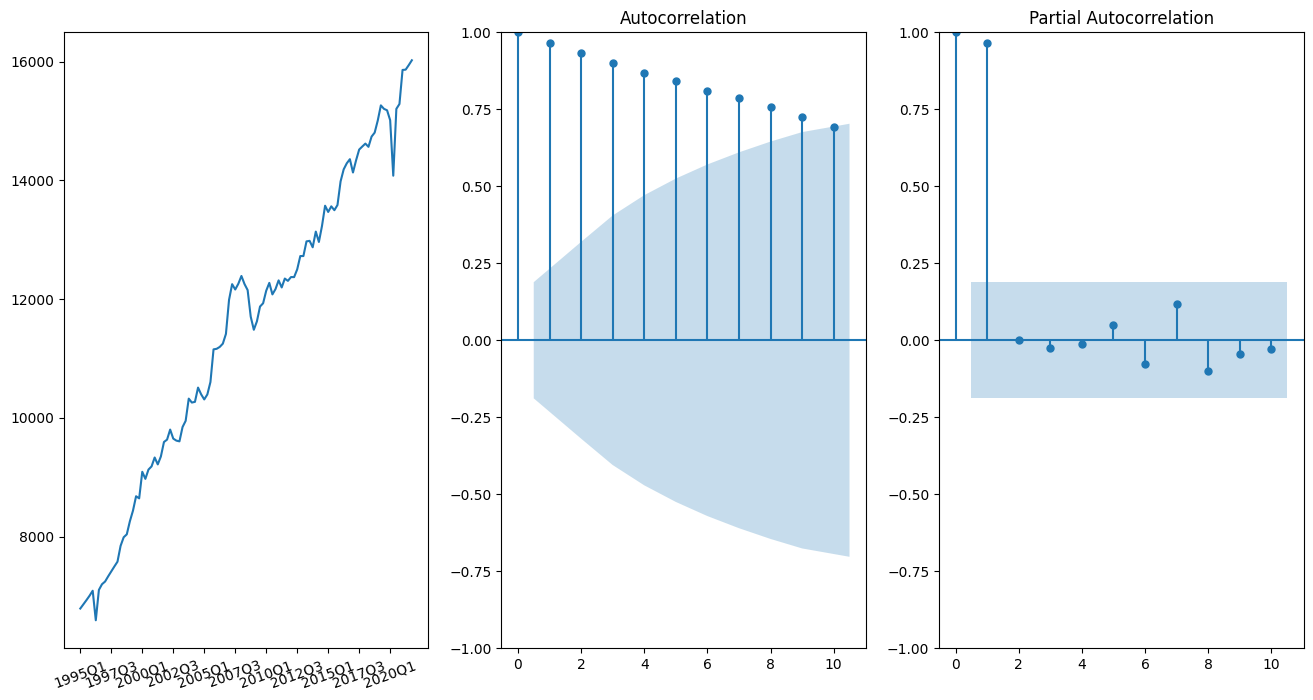

In [4]:
# PART 2

# plots 
fig, axs = plt.subplots(1, 3,figsize=(16,8))
axs[0].plot(df.rgdp)
axs[0].set_xticks(np.arange(0,len(df.rgdp),10))                                                       # display every 10-th tick
axs[0].set_xticklabels(df.date[np.arange(0,len(df.rgdp),10)],rotation=20);                            # label ticks
sm.graphics.tsa.plot_acf(df.rgdp, lags=10, ax=axs[1])
sm.graphics.tsa.plot_pacf(df.rgdp, lags=10, ax=axs[2])

# test for stationarity
# ADF test
print("Results of Dickey-Fuller Test:")
# YOUR CODE HERE
res = sm.tsa.stattools.adfuller(x=df.rgdp, maxlag=5, regression="c", autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")
# KPSS test
print("Results of KPSS Test:")
# YOUR CODE HERE
res = sm.tsa.stattools.kpss(x=df.rgdp, regression="c", nlags="auto")
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print("-----------------------------------")
print("Is the series stationary?")

Results of Dickey-Fuller Test:
Test Statistic:-12.552886766998043
p-value:2.1862153733492148e-23
#Lags Used:0
#Observations Used:106
Results of KPSS Test:
Test Statistic:0.241582796712923
p-value:0.1
-----------------------------------
Is the series stationary?
Can you infeer ARMA(p,q)?


C:\Users\Ant\AppData\Local\Temp\ipykernel_17780\150362844.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = sm.tsa.stattools.kpss(x=y, regression="c", nlags="auto")


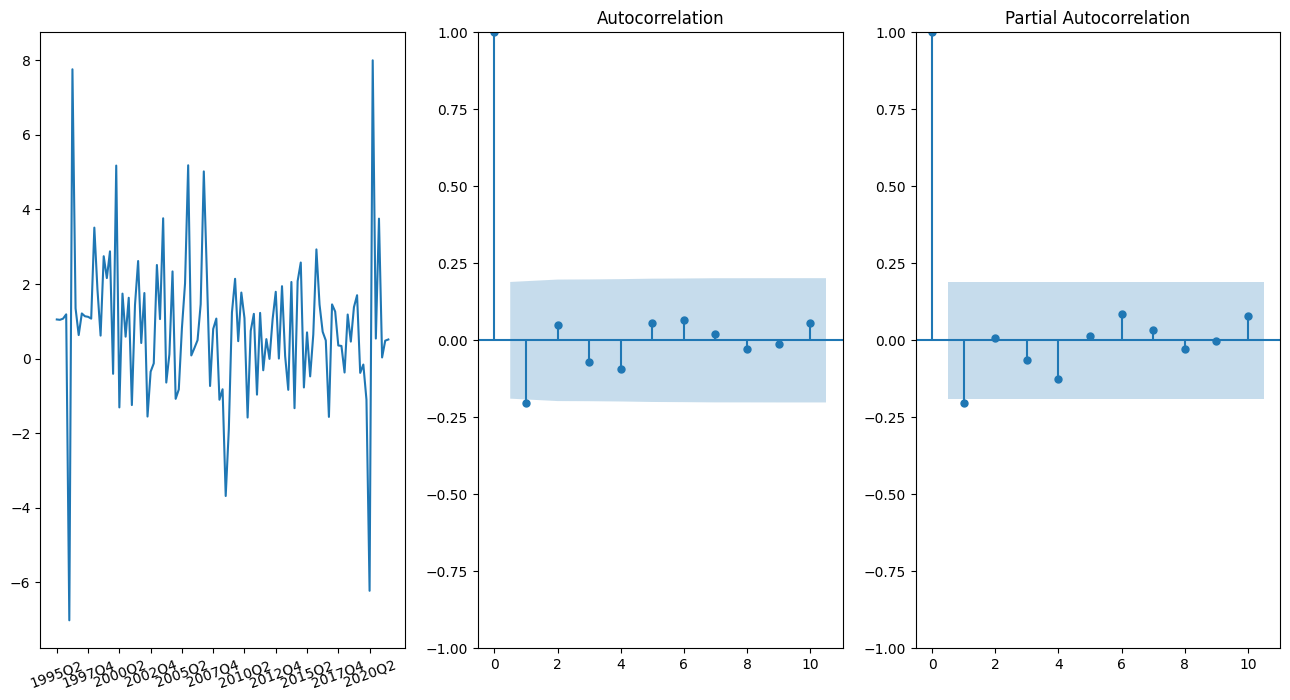

In [5]:
# PART 2 - cont.
# difference the data
Y = np.asarray(df.rgdp)
y = (100*(Y[1:Y.size]/Y[0:Y.size-1]-1))   # growth rate

# plots 
fig, axs = plt.subplots(1, 3,figsize=(16,8))
axs[0].plot(y)
axs[0].set_xticks(np.arange(0,len(y),10))                                                       # display every 10-th tick
axs[0].set_xticklabels(df.date[np.arange(1,len(y),10)],rotation=20);                            # label ticks
sm.graphics.tsa.plot_acf(y, lags=10, ax=axs[1])
sm.graphics.tsa.plot_pacf(y, lags=10, ax=axs[2])

# test for stationarity
# ADF test
print("Results of Dickey-Fuller Test:")
# YOUR CODE HERE
res = sm.tsa.stattools.adfuller(x=y, maxlag=5, regression="c", autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")
# KPSS test
print("Results of KPSS Test:")
# YOUR CODE HERE
res = sm.tsa.stattools.kpss(x=y, regression="c", nlags="auto")
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print("-----------------------------------")
print("Is the series stationary?")
print("Can you infeer ARMA(p,q)?")


In [6]:
# PART 3 Decide on the appropriate ARIMA(p,d,q) model
# estimate ICs
IC = sm.tsa.stattools.arma_order_select_ic(y, max_ar=4, max_ma=4, ic=['aic','bic','hqic'], trend='c')
# display optimal lags
print(f"min AIC at (p,q): {IC.aic_min_order}")
print(f"min BIC at (p,q): {IC.bic_min_order}")
print(f"min HQIC at (p,q): {IC.hqic_min_order}")
print("ANSWER: What lag should we use?")


c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

min AIC at (p,q): (1, 0)
min BIC at (p,q): (0, 0)
min HQIC at (p,q): (1, 0)
ANSWER: What lag should we use?


c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
# Estimate AR(1) and comment the regression table
mod = sm.tsa.arima.ARIMA(y, order=(1, 0, 0), trend='c', validate_specification=True)
res = mod.fit()
print(res.summary())
# COMMENTS: All coeffs are statistically significant. Surprising is that the AR(1) coefficient is negative.
# Residuals seem to be free of first order correlation (Prob(Q)=1). They do not seem to be normally distributed (Prob(JB)=0), however, this is due to excess kurtosis.  


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  107
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -225.158
Date:                Mon, 14 Oct 2024   AIC                            456.316
Time:                        14:49:35   BIC                            464.335
Sample:                             0   HQIC                           459.567
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8264      0.183      4.512      0.000       0.467       1.185
ar.L1         -0.2030      0.067     -3.037      0.002      -0.334      -0.072
sigma2         3.9365      0.344     11.440      0.0

Ljung-Box and Box-Pierce for residual autocorrelation
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.000276   0.986754  0.000268   0.986938
2   0.002503   0.998749  0.002414   0.998794
3   2.943632   0.400398  2.808629   0.422081
4   7.459066   0.113528  7.075507   0.131951
5   7.642762   0.177054  7.247406   0.202881
6   8.035021   0.235549  7.610875   0.268020
7   8.107754   0.323188  7.677602   0.361879
8   8.112852   0.422525  7.682233   0.465110
9   8.365603   0.497763  7.909477   0.543294
10  8.448365   0.585128  7.983127   0.630485
Heteroscedasticity test results:
P-val: 0.001804364116073159
---------------------------------------
The model more or less satisfies the main model checking criteria.
Nevertheless it pays off to estimate also neighbouring models.


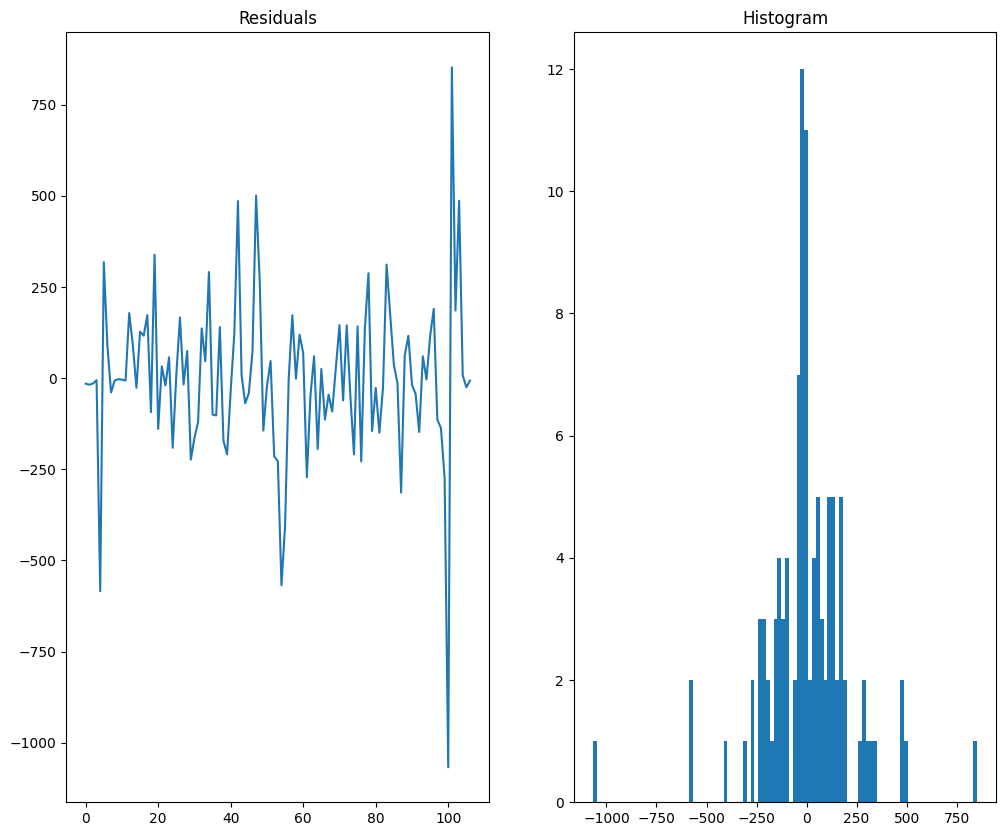

In [9]:
# Plot residuals
fig, axs = plt.subplots(1, 2,figsize=(12,10))
axs[0].plot(res.resid)
axs[0].set_title("Residuals")
axs[1].hist(res.resid,bins=100)
axs[1].set_title("Histogram")

# Test for whiteness of residuals 
print("Ljung-Box and Box-Pierce for residual autocorrelation")
res_lb = sm.stats.diagnostic.acorr_ljungbox(res.resid, lags=10, boxpierce=True,model_df=0+0)
print(res_lb)

# Test for heteroscedasticity
res_het = sm.tsa.stattools.breakvar_heteroskedasticity_test(res.resid, subset_length=1/3, alternative='two-sided')
print("Heteroscedasticity test results:")
print(f"P-val: {res_het[1]}")
print("---------------------------------------")
print("The model more or less satisfies the main model checking criteria.")
print("Nevertheless it pays off to estimate also neighbouring models.")

In [10]:
# Estimate adjacent models
# Increase AR order
mod = sm.tsa.arima.ARIMA(y, order=(2, 0, 0), trend='c', validate_specification=True)
res = mod.fit()
print(res.summary())

# Add MA term
mod = sm.tsa.arima.ARIMA(y, order=(1, 0, 1), trend='c', validate_specification=True)
res = mod.fit()
print(res.summary())

# COMMENT ON THE ABOVE MODELS

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  107
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -730.634
Date:                Mon, 14 Oct 2024   AIC                           1469.268
Time:                        15:56:58   BIC                           1479.959
Sample:                             0   HQIC                          1473.602
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3203     22.137      3.899      0.000      42.933     129.707
ar.L1         -0.1796      0.061     -2.933      0.003      -0.300      -0.060
ar.L2          0.0176      0.084      0.211      0.8

y       mean     mean_se  mean_ci_lower  mean_ci_upper
0  88.080173  223.384968    -349.746319     525.906665
1  85.667971  226.779625    -358.811927     530.147869


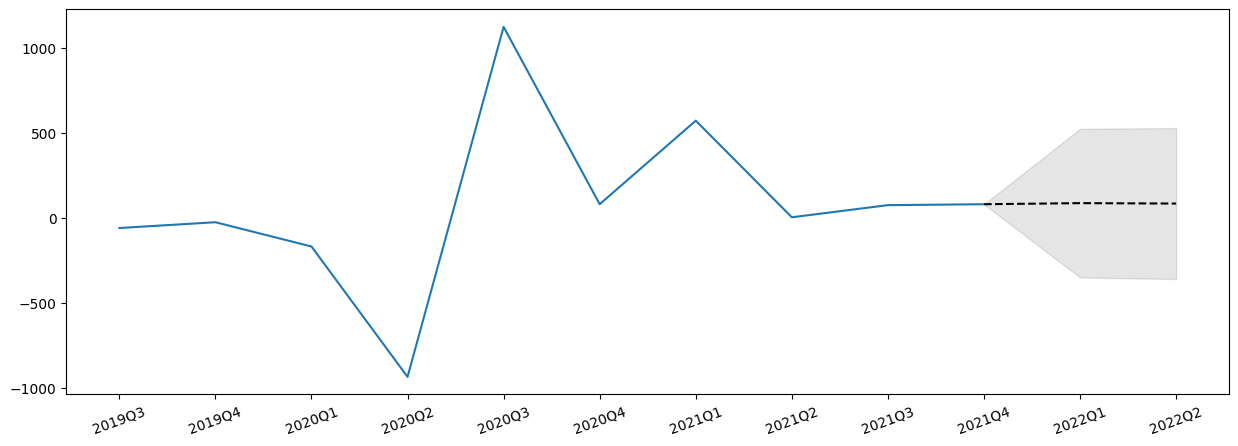

In [11]:
# PART 4 Forecast quarterly rGDP two periods ahead
# print forecasts
from lib2to3.pgen2.token import LBRACE
n_fcs = 2
n_obs = 10
fcs = res.get_forecast(steps=n_fcs)
print(fcs.summary_frame())

# plot forecasts
fig, ax = plt.subplots(figsize=(15, 5))
n = len(y)
# plot y
ax.plot(df.date.iloc[-n_obs:],y[n-n_obs:n])
# get forecast with confidence intervals
fcs = res.get_forecast(steps=n_fcs).summary_frame()
# overlay the forecast on the plot for y
fcs_mean = fcs['mean']
yT = pd.Series(y[-1:])
yTfcs = pd.concat([yT,fcs_mean], axis = 0)
ax.plot(np.arange(n_obs-1,n_obs+n_fcs),yTfcs,'k--')
# add a shaded area for confidence intervals
lb = pd.Series(fcs['mean_ci_lower'])
ub = pd.Series(fcs['mean_ci_upper'])
yTlb = pd.concat([yT,lb], axis = 0)
yTub = pd.concat([yT,ub], axis = 0)
ax.fill_between(np.arange(n_obs-1,n_obs+n_fcs), yTlb, yTub, color='k', alpha=0.1);
# update tick labels
labels = pd.concat([df.date[-n_obs:],pd.Series(['2022Q1'])],axis = 0)
labels = pd.concat([labels,pd.Series(['2022Q2'])],axis = 0)
ax.set_xticks(np.arange(0,n_obs+n_fcs))  
ax.set_xticklabels(labels,rotation=20); 

